In [1]:
import src.utilidade as utilidade, src.zip as zip, src.video as video
import os, matplotlib.pyplot as plt, numpy as np
from tabulate import tabulate

# Virial 6.2:

In [2]:
alvo = 'virial6.2'
destino = 'data/' + alvo
diretorio = destino + "/data"

In [3]:
zip.baixar_zip(f"https://www.ime.usp.br/~oapotalej/{alvo}.zip", f'{destino}.zip')
zip.descompactar(f'{destino}.zip', destino)
os.remove(destino + '.zip')

Arquivo salvo com data/virial6.2.zip
Extraído!


In [5]:
# Primeiro, vamos ler os arquivos
arquivos_antes = utilidade.ler_pastas_diretorio(diretorio)

densidades = list(arquivos_antes.keys())
densidades.sort()
# Vou remover os repetidos por conveniencia
arquivos = {dens: arquivos_antes[dens] for dens in densidades if "_" not in dens}

# Agora vamos calcular as informacoes das simulacoes
for densidade in arquivos:
    arquivo = arquivos[densidade]
    infos = utilidade.infos_simulacao(arquivo['pasta'])
    arquivo['infos'] = infos

Lendo a pasta 'data/virial6.2/data/20250819_001'... lido! (1.53s) informacoes calculadas! (4.13s)
Lendo a pasta 'data/virial6.2/data/20250819_002'... lido! (1.21s) informacoes calculadas! (3.28s)
Lendo a pasta 'data/virial6.2/data/20250820_001'... lido! (1.31s) informacoes calculadas! (3.35s)
Lendo a pasta 'data/virial6.2/data/20250820_004'... lido! (1.55s) informacoes calculadas! (4.22s)
Lendo a pasta 'data/virial6.2/data/20250820_005'... lido! (1.22s) informacoes calculadas! (3.32s)


In [6]:
tabela = []
for densidade in arquivos:
  infos = arquivos[densidade]['infos']
  tabela.append([densidade, infos['raio_meia_massa'][0], infos['tempo_dinamico'][0], infos['escapes'][0], infos['i0'], infos['inercia_central'][0]])
print(tabulate(tabela, headers=["Dens.", "RMH", "TD", "EJ(%)", "I0", "I0"]))

  Dens.       RMH        TD    EJ(%)        I0        I0
-------  --------  --------  -------  --------  --------
  0.03   1.18325   0.954038        0  0.843708  0.841595
  0.035  0.984777  0.870357        0  0.842874  0.840963
  0.04   1.0953    0.917901        0  0.84216   0.839368
  0.045  1.16134   0.945167        0  0.84345   0.842967
  0.05   0.899968  0.832035        0  0.843502  0.840881


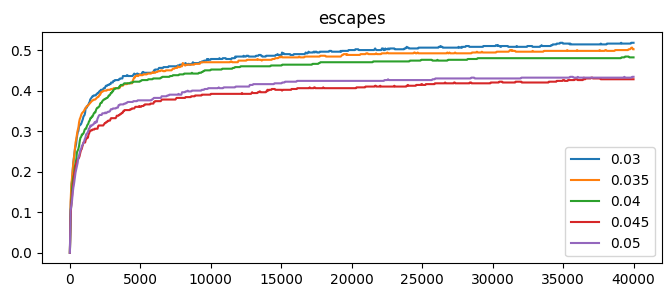

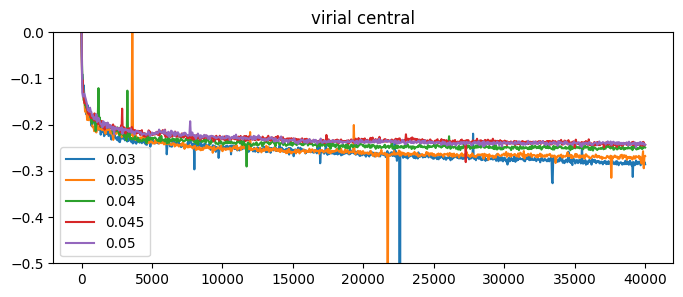

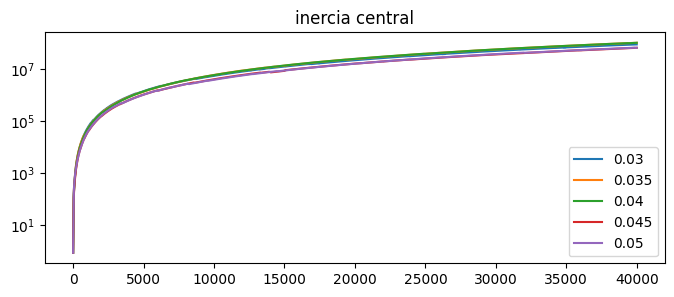

In [7]:
utilidade.fazer_figura(arquivos, 'escapes', 'escapes')

utilidade.fazer_figura(arquivos, 'virial_central', 'virial central', plotar=False)
plt.ylim(-0.5, 0)
plt.show()

utilidade.fazer_figura(arquivos, 'inercia_central', 'inercia central', plotar=False)
plt.yscale('log')
plt.show()

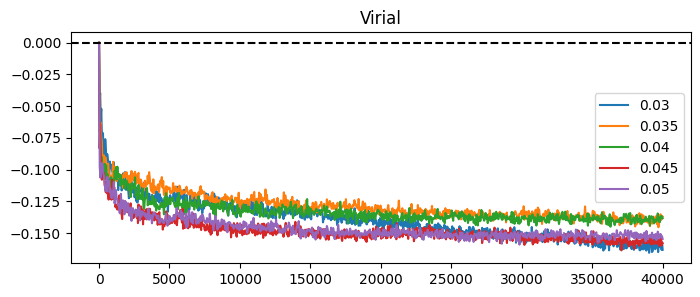

In [8]:
utilidade.fazer_figura(arquivos, 'virial', 'Virial', y_referencia=[0])

  Dens.    Coef. Ang.
-------  ------------
  0.03   -6.54541e-07
  0.035  -4.8191e-07
  0.04   -3.54814e-07
  0.045  -2.74586e-07
  0.05   -3.81794e-07


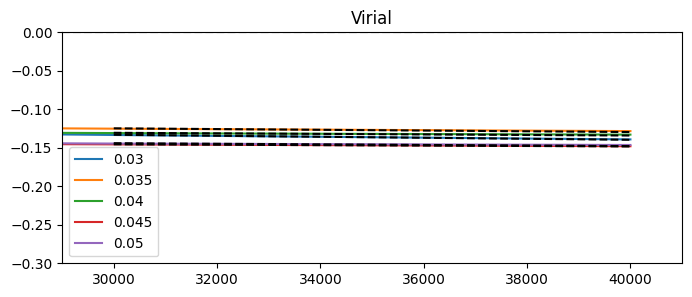

In [9]:
utilidade.fazer_figura(arquivos, 'virial_media', 'Virial', y_referencia=[0], plotar=False)
plt.ylim(-0.3, 0)

tabela = []
for densidade in arquivos:
  if float(densidade) == 0.02: continue
  ys = arquivos[densidade]['infos']['virial_media']
  xs = np.linspace(0, 40000, len(ys))

  x0 = 30000
  plt.xlim(x0-1e3, 41000)
  a, b = utilidade.reta_mmq_local(xs, ys, x0, k=int(x0 * 800/40000))

  xs = np.linspace(x0, 40000, 100)
  yx = (lambda x: a * x + b)(xs)
  plt.plot(xs, yx, c='black', linestyle='--')
  tabela.append([densidade, a])

print(tabulate(tabela, headers=["Dens.", "Coef. Ang."]))
plt.show()